For better user experience,it is highly recommended to download and open this notebook in Google Colab **or** go directly to the https://colab.research.google.com/drive/1pxOnt9qhiLK8Gjb6bCHSE-yIdWwhMc33?usp=sharing link

If you are using Colab,don't forget to install data files(Nigeria2019_ACLED_Extract.csv,Nigeria2019_Newsfeed.csv,Nigeria2019_Newsfeed_Metadata.csv) to the *Files* section

##QUESTION 1

In [1]:
import pandas as pd
import numpy as np
d=pd.read_csv("Nigeria2019_ACLED_Extract.csv")

In [2]:
d.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6713388,566,NIG15966,15966,31-Dec-19,2019,1,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Katsina,Katsina,NaN,Katsina,12.9894,7.6006,1,Daily Trust (Nigeria),National,"On 31 December 2019, thousands of youth demons...",0,1578512391,NGA
1,7784010,566,NIG15968,15968,31-Dec-19,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,Civilians (Nigeria),NaN,7,27,Western Africa,Nigeria,Adamawa,Michika,NaN,Michika,10.6159,13.3849,2,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA
2,6714193,566,NIG15963,15963,31-Dec-19,2019,1,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Enugu,Udi,NaN,Ameke Ngwo,6.4390,7.4017,1,Vanguard (Nigeria),National,"On 31 December 2019, residents of Ameke Ngwo d...",0,1578512393,NGA
3,7784065,566,NIG15967,15967,31-Dec-19,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,Civilians (Nigeria),NaN,7,27,Western Africa,Nigeria,Adamawa,Michika,NaN,Kopa,10.7447,13.3325,1,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA
4,7784086,566,NIG15964,15964,31-Dec-19,2019,1,Explosions/Remote violence,Air/drone strike,Military Forces of Nigeria (2015-),NaN,1,Islamic State (West Africa) - Lake Chad Factio...,NaN,2,12,Western Africa,Nigeria,Borno,Konduga,NaN,Gujeri,11.5333,12.8167,1,Sun (Nigeria),National,"On 31 December 2019, Nigerian Air Force conduc...",0,1617065408,NGA


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           2216 non-null   int64  
 1   iso               2216 non-null   int64  
 2   event_id_cnty     2216 non-null   object 
 3   event_id_no_cnty  2216 non-null   int64  
 4   event_date        2216 non-null   object 
 5   year              2216 non-null   int64  
 6   time_precision    2216 non-null   int64  
 7   event_type        2216 non-null   object 
 8   sub_event_type    2216 non-null   object 
 9   actor1            2216 non-null   object 
 10  assoc_actor_1     746 non-null    object 
 11  inter1            2216 non-null   int64  
 12  actor2            1614 non-null   object 
 13  assoc_actor_2     530 non-null    object 
 14  inter2            2216 non-null   int64  
 15  interaction       2216 non-null   int64  
 16  region            2216 non-null   object 


admin3 feature has only missing values,so it makes sense to eliminate it

In [4]:
d.drop(['admin3'],axis=1,inplace=True)

In [5]:
d['time_precision'].value_counts()

1    1944
2     272
Name: time_precision, dtype: int64

In [6]:
d['geo_precision'].value_counts()

1    1726
2     464
3      26
Name: geo_precision, dtype: int64

In [7]:
d['year'].value_counts()

2019    2216
Name: year, dtype: int64

I want to create three new features:formatted date,month and day.As we are dealing only with events,that happened in 2019,it would be better to not include year to the formatted date

In [8]:
from datetime import datetime

def transform_str_to_date(date):
  date=datetime.strptime(date,'%d-%b-%y').strftime('%d/%B')
  return date

d['event_date_formatted']=d['event_date'].apply(transform_str_to_date)
d.drop(['event_date'],axis=1,inplace=True)

In [9]:
def get_the_day(date):
  date=datetime.strptime(date,'%d/%B')
  return date.day
def get_the_month(date):
  date=datetime.strptime(date,'%d/%B')
  return date.month
d['event_date_day']=d['event_date_formatted'].apply(get_the_day).astype(int)
d['event_date_month']=d['event_date_formatted'].apply(get_the_month).astype(int)

In [10]:
d.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,event_date_formatted,event_date_day,event_date_month
0,6713388,566,NIG15966,15966,2019,1,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Katsina,Katsina,Katsina,12.9894,7.6006,1,Daily Trust (Nigeria),National,"On 31 December 2019, thousands of youth demons...",0,1578512391,NGA,31/December,31,12
1,7784010,566,NIG15968,15968,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,Civilians (Nigeria),NaN,7,27,Western Africa,Nigeria,Adamawa,Michika,Michika,10.6159,13.3849,2,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA,31/December,31,12
2,6714193,566,NIG15963,15963,2019,1,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Enugu,Udi,Ameke Ngwo,6.4390,7.4017,1,Vanguard (Nigeria),National,"On 31 December 2019, residents of Ameke Ngwo d...",0,1578512393,NGA,31/December,31,12
3,7784065,566,NIG15967,15967,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,Civilians (Nigeria),NaN,7,27,Western Africa,Nigeria,Adamawa,Michika,Kopa,10.7447,13.3325,1,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA,31/December,31,12
4,7784086,566,NIG15964,15964,2019,1,Explosions/Remote violence,Air/drone strike,Military Forces of Nigeria (2015-),NaN,1,Islamic State (West Africa) - Lake Chad Factio...,NaN,2,12,Western Africa,Nigeria,Borno,Konduga,Gujeri,11.5333,12.8167,1,Sun (Nigeria),National,"On 31 December 2019, Nigerian Air Force conduc...",0,1617065408,NGA,31/December,31,12


Firstly,it will be reasonable to see how fatality dynamics changes over time

In [11]:
fatalities_date=pd.DataFrame()
fatalities_date['fatalities']=d['fatalities']
fatalities_date['month']=d['event_date_month']

In [12]:
fatalities_date.sort_values(by='month',inplace=True)

In [13]:
fatalities_date

,fatalities,month
2215,4,1
2102,6,1
2101,0,1
2100,0,1
2099,1,1
...,...,...
114,0,12
113,0,12
112,10,12
133,4,12


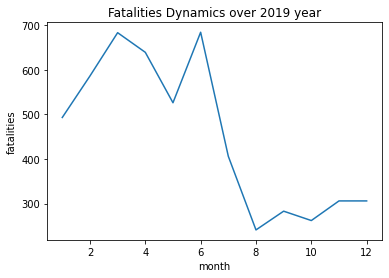

In [14]:
import matplotlib.pyplot as plt
fatalities_date=fatalities_date.groupby(['month']).sum()
plt.xlabel('month')
plt.ylabel('fatalities')
plt.title("Fatalities Dynamics over 2019 year")
plt.plot(fatalities_date.index,fatalities_date['fatalities'])

In [15]:
del fatalities_date

TIP FROM ME:It is a good practice to delete the experimential dataframes,as we don't need them anymore.



In [16]:
fatalities_by_events=pd.DataFrame()
fatalities_by_events['fatalities']=d['fatalities']
fatalities_by_events['event_type']=d['event_type']
fatalities_by_events=fatalities_by_events.groupby(['event_type']).sum()

<BarContainer object of 6 artists>

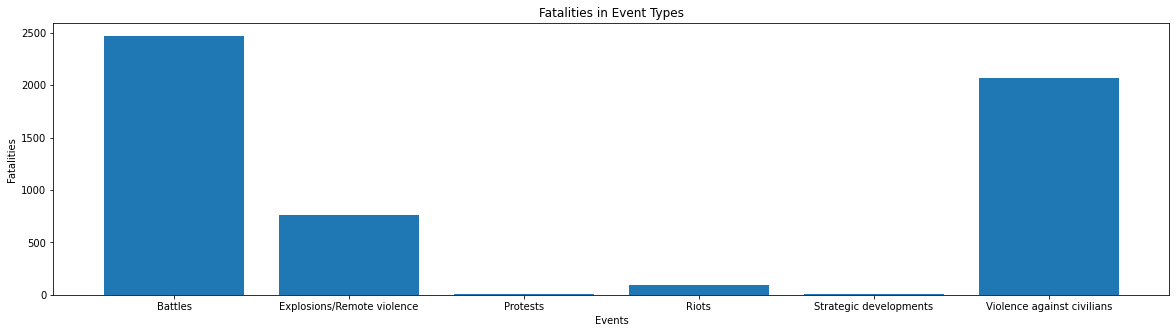

In [17]:
fig=plt.figure(figsize=(20,5))
plt.title("Fatalities in Event Types")
plt.xlabel("Events")
plt.ylabel("Fatalities")
plt.bar(fatalities_by_events.index,fatalities_by_events['fatalities'])

In [18]:
del fatalities_by_events

Again,I delete the experimential dataframe,as we don't need it.

As you can see from the bar chart above,battles and violence against civilians are the deadliest and most harmful event types,while protests and strategic developments barely have any casualties.

In [19]:
fatalities_by_sub_events=pd.DataFrame()
fatalities_by_sub_events['fatalities']=d['fatalities']
fatalities_by_sub_events['sub_event_type']=d['sub_event_type']
fatalities_by_sub_events['event_type']=d['event_type']
major_events=['Battles','Explosions/Remote violence','Violence against civilians']
fatalities_by_sub_events=fatalities_by_sub_events[fatalities_by_sub_events['event_type'].isin(major_events)]
fatalities_by_sub_events.drop(['event_type'],axis=1,inplace=True)
fatalities_by_sub_events=fatalities_by_sub_events.groupby(['sub_event_type']).sum()

<BarContainer object of 10 artists>

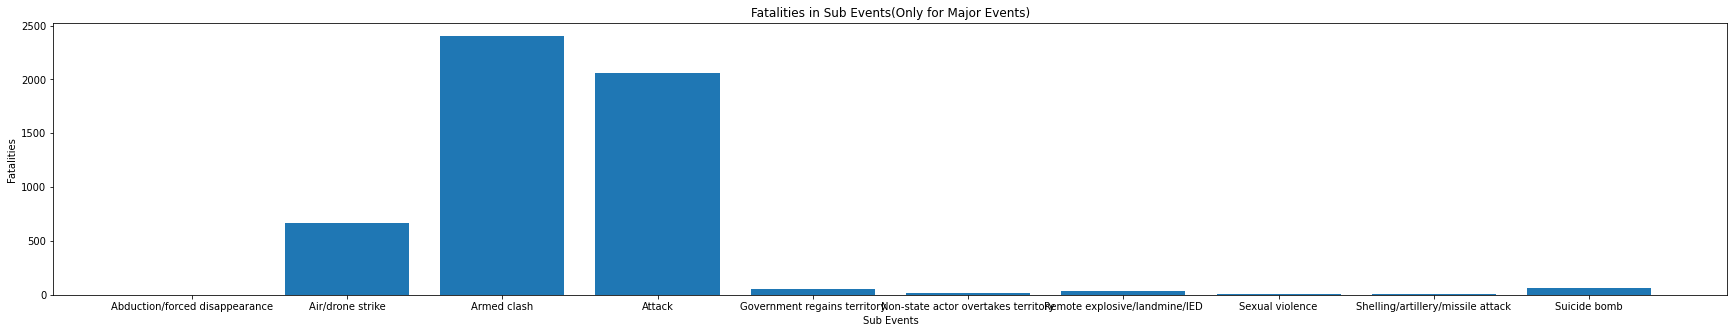

In [20]:
fig=plt.figure(figsize=(30,5))
plt.title("Fatalities in Sub Events(Only for Major Events)")
plt.xlabel("Sub Events")
plt.ylabel("Fatalities")
plt.bar(fatalities_by_sub_events.index,fatalities_by_sub_events['fatalities'])

In [21]:
del fatalities_by_sub_events

While viewing the top-3 most harmful event types,it can be concluded that people die more from armed clashes,attacks and air strikes,rather than other sub-event types. 

In [22]:
import plotly.express as px
event_counts=d['event_type'].value_counts()
fig=px.pie(event_counts,values=event_counts.values,names=event_counts.index,title="Number of Events")
fig.show()

In [23]:
del event_counts

Violence against civilians,protests and battles are the most occurred event types.Even though explosions/remote violence event types account just for 3.93% cases(exact number,87) and is the least common event type,this event type is a reason for more than 600 casualties.

In [24]:
sub_event_counts=d['sub_event_type'].value_counts()
fig=px.pie(sub_event_counts,values=sub_event_counts.values[:10],names=sub_event_counts.index[:10],title="Number of sub events(top 10)")
fig.show()

In [25]:
del sub_event_counts

Attacks,peaceful protests and armed clashes are the most popular sub-event types

In [26]:
most_frequent_interactions=pd.DataFrame()
most_frequent_interactions['interaction']=d['interaction'].value_counts().index
most_frequent_interactions['counts']=d['interaction'].value_counts().values

In [27]:
most_frequent_interactions

,interaction,counts
0,60,573
1,37,373
2,12,289
3,47,234
4,13,111
5,14,90
6,27,79
7,33,76
8,57,72
9,44,55


In [28]:
def get_first_digit(number):
    return number // 10 % 10
def get_second_digit(number):
    return number // 1 % 10
most_frequent_interactions['inter1']=most_frequent_interactions['interaction'].apply(get_first_digit)
most_frequent_interactions['inter2']=most_frequent_interactions['interaction'].apply(get_second_digit)

In [29]:
most_frequent_interactions['actor1']=most_frequent_interactions['inter1']

In order to know,WHO fought WHO,separate print statements can be used


In [30]:
print(d[d['inter1']==6]['actor1'].unique())
print(d[d['inter2']==0]['actor2'].unique())

['Protesters (Nigeria)' 'Protesters (Togo)' 'Protesters (Benin)']
[nan]


In [31]:
print(d[d['inter1']==3]['actor1'].unique())
print(d[d['inter2']==7]['actor2'].unique())

['Unidentified Armed Group (Nigeria)' 'Yansakai Militia'
 'Pirates (Nigeria)' 'APC: All Progressives Congress'
 'NURTW: National Union of Road Transport Workers'
 'PDP: Peoples Democratic Party' 'Unidentified Cult Militia (Nigeria)'
 'Black Axe Student Militia' 'The Eiye Confraternity' 'Aye Cult Militia'
 'Mafia Confraternity' 'IM: Islamic Movement' 'Sara-Suka Militia'
 'Civilian JTF: Civilian Joint Task Force' 'Akwa Ibom Avengers'
 'Icelander Cult Militia' 'Area Boys Militia'
 'Junior Vikings Confraternity' "APM: Allied Peoples' Movement"
 'KSB: Koluama Seven Brothers']
['Civilians (Nigeria)' 'Civilians (International)' 'Civilians (Turkey)'
 'Civilians (Benin)']


There are lots of cases,and it will be a long process to identify WHO fought WHO by using the "print" approach.Moreover,it's a hard process to understand which common goal and interests these organizations share.Fortunately,I've looked to PDF and found that there is specific short definition for each INTEL code.It was an answer to my question "How to group these organizations according to their INTEL code?"

In [32]:
inter_dataframe=pd.DataFrame()
inter_dataframe['intel_codes']=np.arange(0,9)
inter_dataframe['meaning']=['NaN','State Forces','Rebel Groups','Political Militias','Identity Militias','Rioters','Protesters','Civilians','External/Other Forces']

In [33]:
inter_dataframe

,intel_codes,meaning
0,0,NaN
1,1,State Forces
2,2,Rebel Groups
3,3,Political Militias
4,4,Identity Militias
5,5,Rioters
6,6,Protesters
7,7,Civilians
8,8,External/Other Forces


In [34]:
def get_the_meaning(code):
  return inter_dataframe[inter_dataframe['intel_codes']==code]['meaning'].values[0]
most_frequent_interactions['group1']=most_frequent_interactions['inter1'].apply(get_the_meaning)
most_frequent_interactions['group2']=most_frequent_interactions['inter2'].apply(get_the_meaning)

In [35]:
most_frequent_interactions

,interaction,counts,inter1,inter2,actor1,group1,group2
0,60,573,6,0,6,Protesters,NaN
1,37,373,3,7,3,Political Militias,Civilians
2,12,289,1,2,1,State Forces,Rebel Groups
3,47,234,4,7,4,Identity Militias,Civilians
4,13,111,1,3,1,State Forces,Political Militias
5,14,90,1,4,1,State Forces,Identity Militias
6,27,79,2,7,2,Rebel Groups,Civilians
7,33,76,3,3,3,Political Militias,Political Militias
8,57,72,5,7,5,Rioters,Civilians
9,44,55,4,4,4,Identity Militias,Identity Militias


In [36]:
most_frequent_interactions['fight']=most_frequent_interactions['group1']+' vs '+most_frequent_interactions['group2']

In [37]:
fig=px.pie(most_frequent_interactions,values=most_frequent_interactions['counts'],names=most_frequent_interactions['fight'],title="The number of fights between specific organizations")
fig.show()

**blue**-SOLE PROTESTER ACTION (e.g. 1-sided peaceful protest) (the most popular) - 25.9% of all cases

**red**- POLITICAL MILITIA VERSUS CIVILIANS (e.g. out-sourced state repression carried out by pro-government militias; civilian targeting by political militias or unidentified armed groups)-16.8% of all cases

**green**- MILITARY VERSUS REBELS (e.g. civil war violence between state forces and a rebel actor) - 13% of all cases

**violet**- COMMUNAL MILITIA VERSUS CIVILIANS (e.g. civilian targeting, especially in the context of intercommunal violence) - 10.6% of all cases

**orange**- MILITARY VERSUS POLITICAL MILITIA (e.g. violence between state forces and unidentified armed groups; violence between police and political party militias) - 5.01% of all cases

**light-blue**- MILITARY VERSUS COMMUNAL MILITIA (e.g. military engagement with a communal militia) - 4.06% of all cases

**light-red**- REBELS VERSUS CIVILIANS (e.g. rebel targeting of civilians [a strategy commonly used in civil war]) - 3.56% of all cases

**light-green**- POLITICAL MILITIA VERSUS POLITICAL MILITIA (e.g. inter-elite violence) - 3.43% of all cases

**pink**- RIOTERS VERSUS CIVILIANS (e.g. violent demonstration in which civilians are injured/killed; spontaneous violence in which civilians are targeted by a mob) - 3.25% of all cases

**yellow** - COMMUNAL MILITIA VERSUS COMMUNAL MILITIA (e.g. intercommunal violence) - 2.48% of all cases








In this case,COMMUNAL MILITIA is the alias for IDENTITY MILITIA,as stated in the PDF

In [38]:
max_fatality_interactions=pd.DataFrame()
max_fatality_interactions['interaction']=d.groupby('interaction')['fatalities'].sum().index
max_fatality_interactions['fatalities']=d.groupby('interaction')['fatalities'].sum().values
max_fatality_interactions.sort_values(by='fatalities',ascending=False,inplace=True)

In [39]:
max_fatality_interactions

,interaction,fatalities
1,12,1654
22,47,1026
17,37,688
3,14,539
10,27,389
20,44,243
2,13,221
14,34,200
13,33,171
11,28,57


Note that the interaction 60,which is the most popular type of interaction,doesn't have any fatalities

In [40]:
max_fatality_interactions['inter1']=max_fatality_interactions['interaction'].apply(get_first_digit)
max_fatality_interactions['inter2']=max_fatality_interactions['interaction'].apply(get_second_digit)

In [41]:
max_fatality_interactions['group1']=max_fatality_interactions['inter1'].apply(get_the_meaning)
max_fatality_interactions['group2']=max_fatality_interactions['inter2'].apply(get_the_meaning)

In [42]:
max_fatality_interactions['fight']=max_fatality_interactions['group1']+' vs '+max_fatality_interactions['group2']

In [43]:
max_fatality_interactions

,interaction,fatalities,inter1,inter2,group1,group2,fight
1,12,1654,1,2,State Forces,Rebel Groups,State Forces vs Rebel Groups
22,47,1026,4,7,Identity Militias,Civilians,Identity Militias vs Civilians
17,37,688,3,7,Political Militias,Civilians,Political Militias vs Civilians
3,14,539,1,4,State Forces,Identity Militias,State Forces vs Identity Militias
10,27,389,2,7,Rebel Groups,Civilians,Rebel Groups vs Civilians
20,44,243,4,4,Identity Militias,Identity Militias,Identity Militias vs Identity Militias
2,13,221,1,3,State Forces,Political Militias,State Forces vs Political Militias
14,34,200,3,4,Political Militias,Identity Militias,Political Militias vs Identity Militias
13,33,171,3,3,Political Militias,Political Militias,Political Militias vs Political Militias
11,28,57,2,8,Rebel Groups,External/Other Forces,Rebel Groups vs External/Other Forces


In [44]:
max_fatality_interactions=max_fatality_interactions[max_fatality_interactions['fatalities']>10]

In [45]:
fig=px.pie(max_fatality_interactions,values=max_fatality_interactions['fatalities'],names=max_fatality_interactions['fight'],title="Fatalities resulting from fights between specific organizations(<=10 fatalities don't count)")
fig.show()

In [46]:
most_killing_organizations=pd.DataFrame()
most_killing_organizations['organizations']=d.groupby('actor1')['fatalities'].sum().index
most_killing_organizations['fatalities']=d.groupby('actor1')['fatalities'].sum().values

In [47]:
most_killing_organizations.sort_values(by='fatalities',ascending=False,inplace=True)

In [48]:
import plotly.graph_objects as go
most_killing_organizations_top_10=most_killing_organizations.head(10)
fig = go.Figure(go.Bar(
            x=most_killing_organizations_top_10['fatalities'],
            y=most_killing_organizations_top_10['organizations'],
            orientation='h'))

fig.show()

In [49]:
most_suffered_victims=pd.DataFrame()
most_suffered_victims['organizations']=d.groupby('actor2')['fatalities'].sum().index
most_suffered_victims['fatalities']=d.groupby('actor2')['fatalities'].sum().values

In [50]:
most_suffered_victims.sort_values(by='fatalities',ascending=False,inplace=True)

In [51]:
most_suffered_victims_top_10=most_suffered_victims.head(10)
fig = go.Figure(go.Bar(
            x=most_suffered_victims_top_10['fatalities'],
            y=most_suffered_victims_top_10['organizations'],
            orientation='h'))

fig.show()

Nigeria's civilians are the most targeted group.The number of civilians from Nigeria that have been died is more than four times higher,than the number of killed extremists from the most targeted terroristic organization,which is Islamic State-Lake Chad Faction.

In [52]:
events_by_month=pd.DataFrame()
def get_event(arr):
  return arr[1]
def get_month(arr):
  return arr[0]
events=[get_event(arr) for arr in list(d[['event_date_month','sub_event_type']].value_counts().index)]
monthes=[get_month(arr) for arr in list(d[['event_date_month','sub_event_type']].value_counts().index)]
events_by_month['month']=monthes
events_by_month['event']=events
events_by_month['count']=d[['event_date_month','sub_event_type']].value_counts().values

In [53]:
events_by_month[events_by_month['month']==3].sort_values('count',ascending=False)

,month,event,count
2,3,Armed clash,64
3,3,Attack,60
20,3,Peaceful protest,42
38,3,Mob violence,16
42,3,Looting/property destruction,12
49,3,Abduction/forced disappearance,9
72,3,Violent demonstration,5
106,3,Remote explosive/landmine/IED,3
112,3,Change to group/activity,2
114,3,Protest with intervention,2


In [54]:
events_by_month_top_3=pd.DataFrame()
for month in range(1,13):
  top_3=events_by_month[events_by_month['month']==month].sort_values('count',ascending=False).head(3)
  events_by_month_top_3=pd.concat([events_by_month_top_3,top_3],axis=0)

In [55]:
events_by_month_top_3

,month,event,count
6,1,Armed clash,56
22,1,Peaceful protest,40
34,1,Attack,29
0,2,Attack,109
9,2,Armed clash,52
16,2,Peaceful protest,45
2,3,Armed clash,64
3,3,Attack,60
20,3,Peaceful protest,42
10,4,Attack,51


Attacks,peaceful protests and armed clashes were in top-3 by popularity in each month.So,it makes sense to create a grouped bar chart to distinguish the "special" months,where one type of sub-event was a lot more common,than other two types

In [ ]:
attacks=[]
peaceful_protests=[]
armed_clashes=[]
for month in range(1,13):
  attacks.append(events_by_month_top_3[events_by_month_top_3['month']==month][events_by_month_top_3['event']=='Attack']['count'].values[0])
  peaceful_protests.append(events_by_month_top_3[events_by_month_top_3['month']==month][events_by_month_top_3['event']=='Peaceful protest']['count'].values[0])
  armed_clashes.append(events_by_month_top_3[events_by_month_top_3['month']==month][events_by_month_top_3['event']=='Armed clash']['count'].values[0])

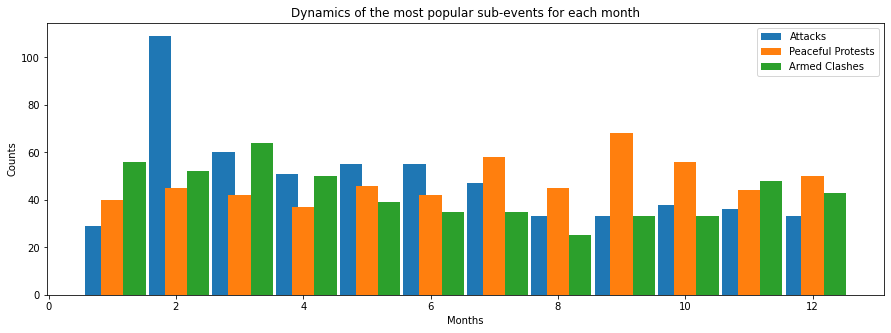

In [57]:
labels=list(events_by_month_top_3['month'].unique())
x = np.arange(1,len(labels)+1)
width = 0.35 
fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width+0.1, attacks, width, label='Attacks')
rects2 = ax.bar(x, peaceful_protests, width, label='Peaceful Protests')
rects3 = ax.bar(x + width, armed_clashes, width, label='Armed Clashes')

ax.set_ylabel('Counts')
ax.set_xlabel('Months')
ax.set_title('Dynamics of the most popular sub-events for each month')
ax.legend()

**INSIGHTS:**
- The highest amounts of attacks happened in February(more than 100 cases)
- The most "peaceful" month is September
- Starting from April,the attacks and armed clashes gradually decrease,while peaceful protests increase(IMO,weather conditions can be one of the factors)
- Starting from October,the number of armed clashes and attacks slightly increase,while the number of peaceful protests decrease

One of the factors why June is an exception in the fatalities dynamics:

In [58]:
exp=d[d['sub_event_type']=='Suicide bomb'].sort_values(by='fatalities',ascending=False)
exp[['event_date_month','fatalities']]

,event_date_month,fatalities
1097,6,30
1650,3,11
1882,2,11
805,8,5
1522,4,5


In [59]:
d['country'].unique()

array(['Nigeria'], dtype=object)

In [60]:
d['region'].unique()

array(['Western Africa'], dtype=object)

In [61]:
d['iso3'].unique()

array(['NGA'], dtype=object)

In [62]:
d['location'].unique()

array(['Katsina', 'Michika', 'Ameke Ngwo', 'Kopa', 'Gujeri', 'Ilorin',
       'Abulam', 'Mandaragirau', 'Uro Ajowa', 'Ikpide Irri', 'Umusadege',
       'Jattu', 'Yola', 'Maisani', 'Darawa', 'Dutsin Ma', 'Iwaro Oka',
       'Imiakebu', 'Kurfi', 'Abuja', 'Zurmi', 'Bama', 'Gassol', 'Calabar',
       'Enugu', 'Sambisa Forest Reserve', 'Maina Hari', 'Chibok',
       'Otuaka', 'Madagali', 'Maiduguri', 'Korongelen Bula Dun*',
       'Wasagu', 'Damaturu', 'Asaba', 'Akure', 'Kelluri', 'Biu', 'Banari',
       'Abeokuta', 'Badu', 'Gasarwa', 'Gudumbali', 'Kukawa', 'Monguno',
       'Wamiri', 'Pulka', 'Burimari', 'Gajigana', 'Shiroro', 'Dikwa',
       'Oshogbo', 'Onitsha', 'Ile-Ife', 'Lagos', 'Ebom', 'Bulou Ojobo',
       'Abakaliki', 'Birnin Gwari', 'Iwhreka', 'Uhkirhi', 'Orin',
       'Kirta Wulgo', 'Surulere', 'Ganye', 'Ikot Nakanda', 'Chul',
       'Ngoshe', 'Issele Mkpitime', 'Ikorodu', 'Fuye', 'Umuohiagu',
       'Abako', 'Ogidi', 'Benin City', 'Lokoja', 'Amago-Ebenebe',
       'Mamuri', 'Jal

In [63]:
d['fatalities'].describe()

count    2216.000000
mean        2.443592
std         5.569546
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        66.000000
Name: fatalities, dtype: float64

Size will represent the fatalities,while the color will represent the event type.By clicking to cluster,other additional information will be available.

In [64]:
d['text']=d['sub_event_type']+'<br>Initiator: '+d['actor1']+'<br>Location: '+d['location']+'<br>Date: '+d['event_date_formatted']+'<br>Fatalities: '+d['fatalities'].astype(str)
limits = list(d['event_type'].unique())
colors = ["royalblue","yellow","lightseagreen","red","lightgrey","green"]
scale = 2

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = d[d['event_type']==lim]
    fig.add_trace(go.Scattergeo(
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = (df_sub['fatalities']+1)*4, # +1 because there are events with 0 fatalities
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = lim))

fig.update_layout(
        title_text = '2019 Nigeria clashes<br> Click legend to toggle traces and zoom in for better experience',
        showlegend = True,
        geo = dict(
            scope = 'africa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

INSIGHTS:
- Overwhelming majority of battles happened in the north of Nigeria
- The northern part of Nigeria is considered as a part of Nigeria,where events with high number of fatalities happen(just compare the size of clusters in between the north part and the south part)
- When looking to the north part,it can be seen that there are two major "dangerous" territories:first one is in the northwestern part,and another one is in a part of Nigeria,which is partially surrounded by Cameroon,Chad and Niger.

##QUESTION 2

In [65]:
newsfeed_d=pd.read_csv('Nigeria2019_Newsfeed.csv')
newsfeed_d.head()

,Newsfeed_PK,KPIFK,DateFK,Newsfeed_EventId,CountryFK,Newsfeed_Source,Newsfeed_Source_Description,Newsfeed_Source_Url,Newsfeed_DateDisplay,Newsfeed_CountryISO,Newsfeed_Country,Newsfeed_Country_UNDPRegion,Newsfeed_IncidentType,Newsfeed_IncidentLevel,Newsfeed_IncidentTypeDesc,Newsfeed_Description,Newsfeed_Description2,Newsfeed_Link,Newsfeed_Longitude,Newsfeed_Latitude,Newsfeed_Trajectory,Newsfeed_PeopleAffected,Newsfeed_Source2,Newsfeed_Language,Newsfeed_Entity
0,14127,109.0,20190111,18691,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/11/19 5:00,NGA,Nigeria,Africa,Armed Conflict,NaN,NaN,"ARMED CONFLICT On 09 January 2019, at about 22...","ARMED CONFLICT On 09 January 2019, at about 22...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
1,14153,109.0,20190118,18720,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/18/19 5:00,NGA,Nigeria,Africa,Armed Conflict,NaN,NaN,"ARMED CONFLICTOn 16 January 2019, 1230hours, B...","ARMED CONFLICTOn 16 January 2019, 1230hours, B...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
2,14206,109.0,20190125,18779,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/25/19 5:00,NGA,Nigeria,Africa,Armed Conflict,NaN,NaN,ARMED CONFLICTOn 25 January 2019 at about 0400...,ARMED CONFLICTOn 25 January 2019 at about 0400...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
3,14317,109.0,20190208,18909,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/8/19 5:00,NGA,Nigeria,Africa,Armed Conflict,NaN,NaN,ARMED CONFLICTOn 07 February 2019 at about 183...,ARMED CONFLICTOn 07 February 2019 at about 183...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
4,14428,109.0,20190215,19028,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/15/19 5:00,NGA,Nigeria,Africa,Armed Conflict,NaN,NaN,ARMED CONFLICTOn 12 February 2019 at about 180...,ARMED CONFLICTOn 12 February 2019 at about 180...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN


In [66]:
newsfeed_d['Newsfeed_Language'].value_counts()

English      24483
Afrikaans       10
Name: Newsfeed_Language, dtype: int64

In [67]:
newsfeed_d=newsfeed_d[newsfeed_d['Newsfeed_Language']=='English']

In [68]:
newsfeed_d.shape

(24483, 25)

In [69]:
print(newsfeed_d['Newsfeed_Description'][1])
print(newsfeed_d['Newsfeed_Description2'][1])

ARMED CONFLICTOn 16 January 2019, 1230hours, Boko Haram elements reportedly ambushed a civilian convoy that was escorted...
ARMED CONFLICTOn 16 January 2019, 1230hours, Boko Haram elements reportedly ambushed a civilian convoy that was escorted by security forces along a section of the Dikwa ‚Äì Ngala road (about 16Km NE of Dikwa Town) in Borno State. According to reports, security personnel escorting the convoy repelled the attack, killing one (1) of the attackers while others escaped from the scene. However, two (2) civilians in the convoy were killed.On 15 January 2019 at about 1830hours, reports indicate that Boko Haram members attacked a security forces deployment area in Gajiram town of Nganzai LGA in Borno State. The attackers engaged security personnel in an exchange of fire but were later repelled. It is not clear if there were casualties during the incidentOn 14 January 2019 at about 1630 hours, BHI-ISWAP launched an aggressive attack against troops' position at Rann in Kala 

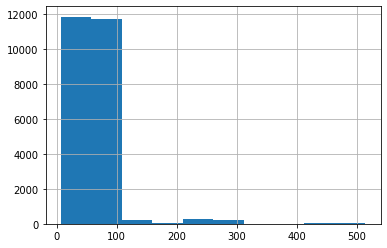

In [70]:
newsfeed_d['Newsfeed_Description'].str.len().hist()

The number of characters in short descriptions normally reaches up to 100

(0.0, 3000.0)

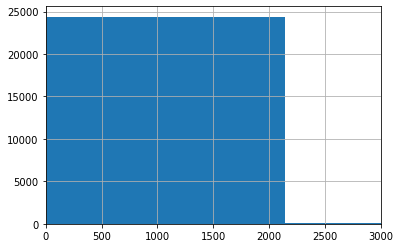

In [71]:
newsfeed_d['Newsfeed_Description2'].str.len().hist().set_xlim((0,3000))

The number of characters in long descriptions normally reaches up to more than 2000

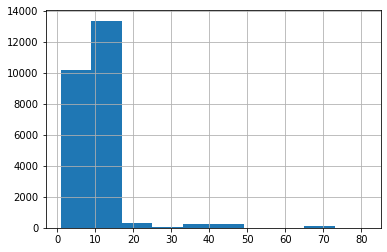

In [72]:
newsfeed_d['Newsfeed_Description'].str.split().map(lambda x: len(x)).hist()

Each short description normally contains 10-20 words

(0.0, 500.0)

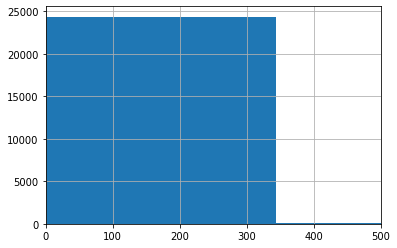

In [73]:
newsfeed_d['Newsfeed_Description2'].str.split().map(lambda x: len(x)).hist().set_xlim((0,500))

Each long description normally contains up to 300 words

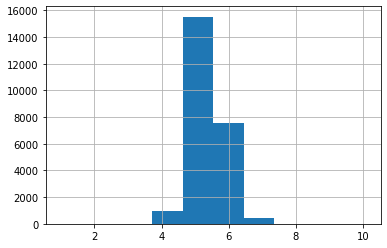

In [74]:
newsfeed_d['Newsfeed_Description2'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The average word length for most of the words in full descriptions ranges between 5 and 6

In [75]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [76]:
from collections import defaultdict
corpus=[]
new= newsfeed_d['Newsfeed_Description'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word]+=1

In [77]:
top_values=sorted(dic.items(), key =lambda kv:(kv[1], kv[0]))[-10:][::-1]

In [78]:
values=[t[1] for t in top_values]
stopwords=[t[0] for t in top_values]

<BarContainer object of 10 artists>

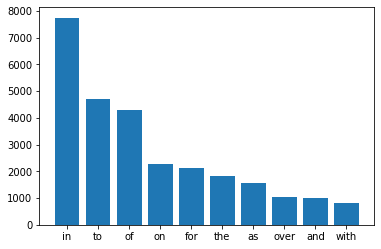

In [79]:
import matplotlib.pyplot as plt # in case if this importing has not been run previously in Question 1
plt.bar(stopwords,values)

This is the bar chart,that shows the most frequent stop words used in short descriptions

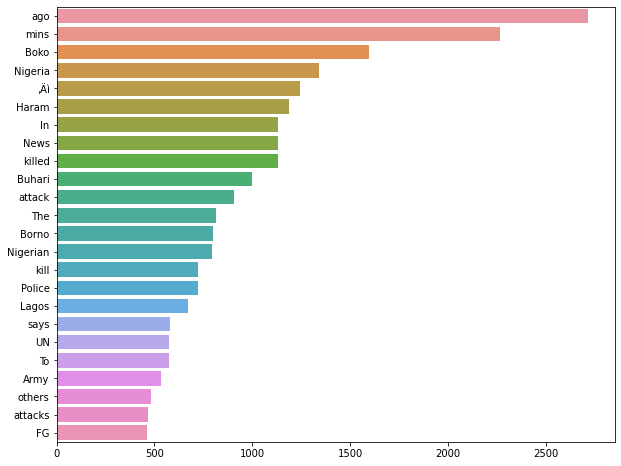

In [80]:
import seaborn as sns
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
fig, ax = plt.subplots(figsize=(10,8))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x,ax=ax)

These are the most frequent words used in short descriptions.Stopwords have been excluded.

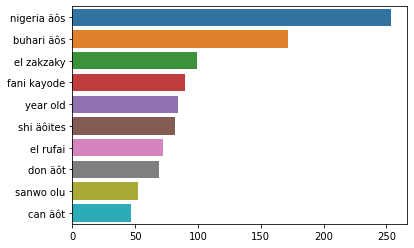

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_top =sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
x,y=map(list,zip(*words_freq_top))
sns.barplot(x=y,y=x)

This graph shows the most frequent sequences of 2 words,or so called bigrams(n-grams technique has been used).El Zakzaky is a Shia leader and Fani Kayode is a renowned Nigerian politician.They are the most mentioned personas in the news articles.El Rufai is also in the top-10 and he is also a politician and a governor of the Kaduna State

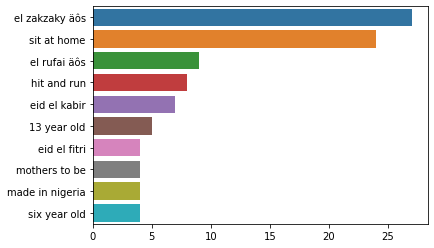

In [82]:
vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_top =sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
x,y=map(list,zip(*words_freq_top))
sns.barplot(x=y,y=x)

This graph shows the most frequent sequences of 3 words,or so called trigrams(again,n-grams has been used).El Zakzaky and El Rufai are mentioned here as well.However,there are also strange sequences,such as "sit at home","13 year old","six year old" and "hit and run"."13 year old" and "six year old" most probably were used in news articles,that referenced sexual and physical violence against minors.

From now on,i will analyze only long descriptions as they are more informative

In [83]:
corpus=[]
new= newsfeed_d['Newsfeed_Description2'].str.split()
new=new.values.tolist()
corpus=[word.lower() for i in new for word in i] # lower() is essential in this case,as stopwords are case-sensitive

<BarContainer object of 10 artists>

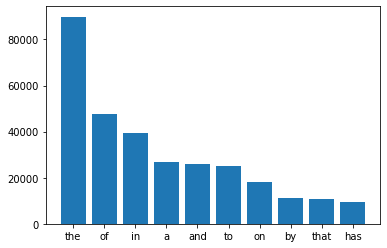

In [84]:
dic=defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word]+=1
top_values=sorted(dic.items(), key =lambda kv:(kv[1], kv[0]))[-10:][::-1]
values=[t[1] for t in top_values]
stopwords=[t[0] for t in top_values]
plt.bar(stopwords,values)

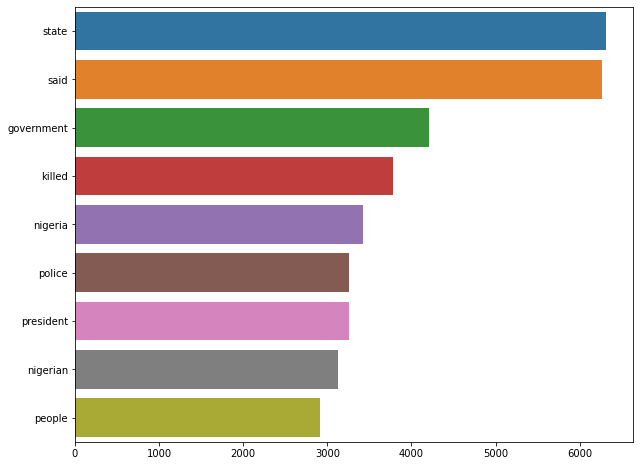

In [85]:
counter=Counter(corpus)
most=counter.most_common()
fig, ax = plt.subplots(figsize=(10,8))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x,ax=ax)

This graph shows the most frequent words,that appeared in full descriptions of the news articles

We have only 9 words here,because other 31 words were stopwords.Note,that I picked most common 40 words and removed stopwords from this list.

Topic modeling

In [86]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
corpus=[]
lem=WordNetLemmatizer()
for news in newsfeed_d['Newsfeed_Description2']:
  words=[w for w in word_tokenize(news) if (w not in stop)]
  words=[lem.lemmatize(w) for w in words if len(w)>2]
  corpus.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [87]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [88]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 5, id2word = dic,passes = 10,workers = 2,random_state=10)
lda_model.show_topics()

[(0,
  '0.013*"The" + 0.008*"group" + 0.008*"protest" + 0.007*"But" + 0.007*"attack" + 0.007*"likely" + 0.006*"election" + 0.006*"government" + 0.006*"probably" + 0.005*"said"'),
 (1,
  '0.019*"The" + 0.016*"State" + 0.011*"..." + 0.010*"Lagos" + 0.010*"said" + 0.008*"road" + 0.008*"accident" + 0.008*"people" + 0.007*"explosion" + 0.006*"person"'),
 (2,
  '0.020*"The" + 0.018*"..." + 0.015*"Nigeria" + 0.011*"President" + 0.009*"said" + 0.009*"country" + 0.008*"Buhari" + 0.007*"Muhammadu" + 0.006*"National" + 0.005*"Nigerian"'),
 (3,
  '0.016*"..." + 0.012*"The" + 0.006*"Police" + 0.004*"one" + 0.004*"year" + 0.004*"arrested" + 0.003*"suspect" + 0.003*"said" + 0.003*"Lagos" + 0.003*"police"'),
 (4,
  '0.019*"The" + 0.018*"State" + 0.013*"attack" + 0.013*"killed" + 0.013*"said" + 0.012*"Boko" + 0.012*"Haram" + 0.012*"..." + 0.008*"Nigerian" + 0.008*"Borno"')]

1.The,protest,group,attack,election,government - this topic is about protests,that are likely to be caused as a consequence of the election

2.The,State,Lagos,road,accident,people - this topic is about manmade disasters

3.Nigeria,president,Buhari,Muhammadu,country,said,Abuja,National - this topic is related mostly to the current president of Nigeria,Muhammadu Buhari

4.Police,arrested,suspect,Lagos - this topic is related to the events,happened in Lagos and the police investigations

5.The,State,attack,said,killed,Boko,Haram,Nigerian,terrorist - this topic is solely related to Boko Haram and its terroristic acts

Word Cloud

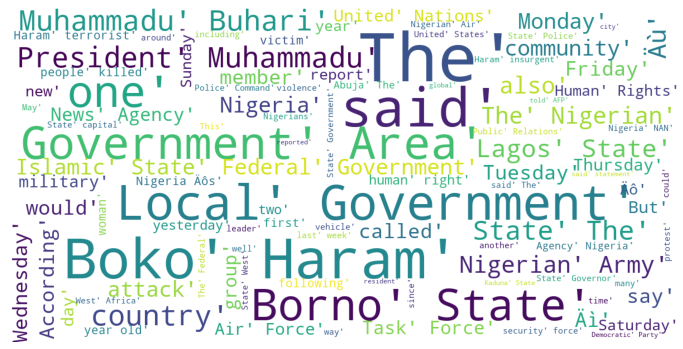

In [89]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=100,max_font_size=40,scale=3,random_state=1)
wordcloud=wordcloud.generate(str(corpus))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Boko Haram is the terroristic organization and the name of this terroristic organization has been mentioned frequently by the newsfeed.

Government,State,President,Local are also the keywords,that appear frequently in the newsfeed

---



Sentiment Analysis

It is reasonable to conduct Sentiment Analysis,in order to know the emotional type of the news articles:positive,negative or neutral.In order to assess the "degree" of positivity or negativity,polarity scores are used.In this case I will use pre-trained TextBlob

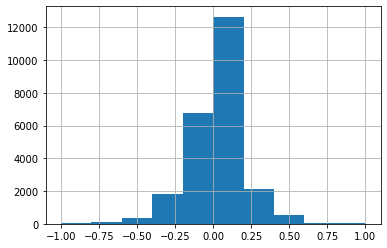

In [90]:
from textblob import TextBlob
newsfeed_d['polarity_score']=newsfeed_d['Newsfeed_Description2'].apply(lambda x:TextBlob(x).sentiment.polarity)
newsfeed_d['polarity_score'].hist()

Most of the news articles have polarity scores ranging from 0 to 0.2.

<BarContainer object of 3 artists>

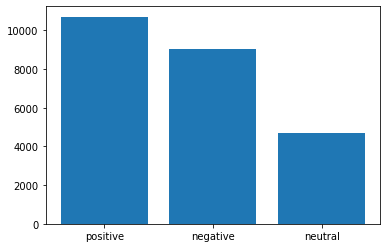

In [91]:
def sentiment(x):
  if x<0:
    return 'negative'
  elif x==0:
    return 'neutral'
  else:
    return 'positive'
    
newsfeed_d['polarity']=newsfeed_d['polarity_score'].map(lambda x: sentiment(x))

plt.bar(newsfeed_d.polarity.value_counts().index,newsfeed_d.polarity.value_counts())

In [92]:
newsfeed_d['Newsfeed_IncidentType'].value_counts()

UNDP_TerroristAttack         6344
UNDP_Conflict                4687
UNDP_ManMadeDisasters        3621
UNDP_Security                3459
UNDP_Society                 2500
UNDP_ScienceandTechnology    2005
UNDP_NaturalDisasters         538
UNDP_Ecology                  404
UNDP_Genocide                 307
UNDP_PoliticalUnrest          250
UNDP_Drought                  177
UNDP_HumanitarianAid           42
Armed Conflict                 30
UNDP_WaterConflict             27
Conflict                        8
Governance                      8
Human Development               3
Displacement                    2
Name: Newsfeed_IncidentType, dtype: int64

In [93]:
newsfeed_d['Newsfeed_Country'].value_counts()

Nigeria    24483
Name: Newsfeed_Country, dtype: int64

In [94]:
newsfeed_d['Newsfeed_DateDisplay']

0         1/11/19 5:00
1         1/18/19 5:00
2         1/25/19 5:00
3          2/8/19 5:00
4         2/15/19 5:00
             ...      
24488    10/29/19 0:00
24489     11/4/19 0:00
24490     11/5/19 0:00
24491    11/26/19 0:00
24492    12/10/19 0:00
Name: Newsfeed_DateDisplay, Length: 24483, dtype: object

In [95]:
from datetime import datetime # in case if it has not been imported in Question 1
newsfeed_d['Newsfeed_DateFormatted']=newsfeed_d['Newsfeed_DateDisplay'].apply(lambda x :datetime.strptime(x,'%m/%d/%y %H:%M'))
newsfeed_d['Newsfeed_DateFormatted']=pd.to_datetime(newsfeed_d['Newsfeed_DateFormatted'])

In [96]:
newsfeed_d.columns

Index(['Newsfeed_PK', 'KPIFK', 'DateFK', 'Newsfeed_EventId', 'CountryFK',
       'Newsfeed_Source', 'Newsfeed_Source_Description', 'Newsfeed_Source_Url',
       'Newsfeed_DateDisplay', 'Newsfeed_CountryISO', 'Newsfeed_Country',
       'Newsfeed_Country_UNDPRegion', 'Newsfeed_IncidentType',
       'Newsfeed_IncidentLevel', 'Newsfeed_IncidentTypeDesc',
       'Newsfeed_Description', 'Newsfeed_Description2', 'Newsfeed_Link',
       'Newsfeed_Longitude', 'Newsfeed_Latitude', 'Newsfeed_Trajectory',
       'Newsfeed_PeopleAffected', 'Newsfeed_Source2', 'Newsfeed_Language',
       'Newsfeed_Entity', 'polarity_score', 'polarity',
       'Newsfeed_DateFormatted'],
      dtype='object')

In [97]:
newsfeed_d['Newsfeed_DateFormatted']

0       2019-01-11 05:00:00
1       2019-01-18 05:00:00
2       2019-01-25 05:00:00
3       2019-02-08 05:00:00
4       2019-02-15 05:00:00
                ...        
24488   2019-10-29 00:00:00
24489   2019-11-04 00:00:00
24490   2019-11-05 00:00:00
24491   2019-11-26 00:00:00
24492   2019-12-10 00:00:00
Name: Newsfeed_DateFormatted, Length: 24483, dtype: datetime64[ns]

In [98]:
newsfeed_d['Newsfeed_DateMonth']=newsfeed_d['Newsfeed_DateFormatted'].apply(lambda x:x.month)

Text(0.5, 1.0, 'Overall polarity score of news articles,published in each month')

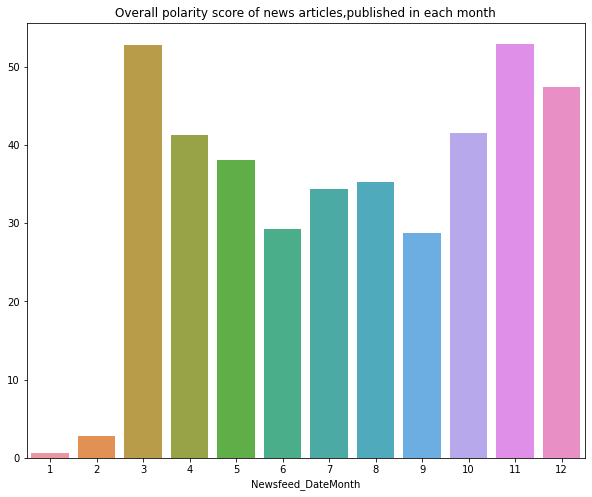

In [99]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=newsfeed_d.groupby('Newsfeed_DateMonth')['polarity_score'].sum().index,y=newsfeed_d.groupby('Newsfeed_DateMonth')['polarity_score'].sum().values,ax=ax)\
.set_title("Overall polarity score of news articles,published in each month")

January has low polarity score,most probably due to the low amount of news articles,published this month.However,there is an interesting correlation.In the Question 1,it has been identified that February was the month when the highest numbers of attacks happened (in the grouped bar chart),and here,it can be seen,that February has low polarity score.Most probably,because majority of news articles was focusing on these attacks,which of course has  negative semantics

THIS GRAPH IS NOT VERY INFORMATIVE,as it does contain the number of published news articles into account.This factor should be eliminated in order to better assess the polarity scores for each month.In this case,I decided to compare means of polarity scores(sum of polarity scores/the number of news articles) rather than only the sum

##QUESTION 3

Text(0.5, 1.0, 'Mean polarity score of news articles,published in each month')

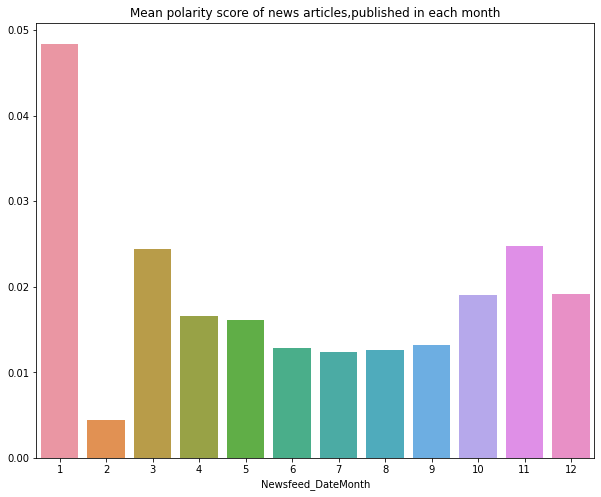

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
x=newsfeed_d.groupby('Newsfeed_DateMonth')['polarity_score'].sum()/newsfeed_d['Newsfeed_DateMonth'].value_counts().sort_index()
sns.barplot(x=x.index,y=x.values,ax=ax)\
.set_title("Mean polarity score of news articles,published in each month")

As it can be seen from the graph,the average news article,that has been published in February,has the lowest polarity score compared to another articles,published in other months.

Also I want to note that news articles,published in summer,have identically low polarity scores(but not as low as in February),and it's mostly due to the large number of protests.It also should be said that summer has the perfect weather conditions for conducting various military operations 